In [2]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment
from nltk.tokenize import word_tokenize

### fetching the article from the internet

In [5]:
r=requests.get('https://www.newsy.com/stories/commercial-companies-advance-space-exploration/')

In [6]:
r.encoding = 'utf-8'

In [7]:
html = r.text

In [8]:
print(html[:500])

<!DOCTYPE html><html lang="en"><head><!-- Google Analytics --><script>
            (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
            (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
            m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
            })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

            ga('create', 'UA-5101570-1', 'auto');
    


### removing all the html jargins and getting the main text from the atricle

In [9]:
soup = BeautifulSoup(html)
text = soup.get_text()

In [10]:
len(text)


4176

In [11]:
print(text[100:1100])

thTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere to watchHow Commercial Companies Are Advancing Space ExplorationShareTweetEmailSMSHow Commercial Companies Are Advancing Space ExplorationBy Clayton SandellBy Clayton SandellOctober 29, 2021October 29, 2021There's competition among roughly a dozen private companies to launch new space stations.As astronauts blast off to the International Space Station this weekend on a SpaceX rocket, the company is also showing off a massive ship it says will one day take travelers far, far away.Newly released video shows the 'Starship' lifting into an aerial ballet of flips and turns before landing again. SpaceX hopes the ship will reach orbit for the first time next month and maybe, one day, make founder Elon Musk's mission-to-Mars dreams a reality."He says, 'I want to die on Mars, just not on impact,'" editor for Spaceref.com Keith Cowing said. "I've known Elon forever, for like 20 years. I met him when he was actually a 

#### cleaning the text

In [12]:
clean_text= text.replace("\n", " ")
clean_text= clean_text.replace("/", " ")   
clean_text= clean_text.replace(",", " ")
clean_text= ''.join([c for c in clean_text if c != "'"])

### tokenizing the string with each token being a sentence 
#### also removing the stop words at the same time

In [16]:
stopwords = nltk.corpus.stopwords.words('english')

sentence=[]
tokens = nlp(clean_text)
for sent in tokens.sents:
    tokens = word_tokenize((sent.text.strip()))
    new_sentence = []
    for word in tokens:
        if word not in stopwords:
            new_sentence.append(word)
    sentence.append(' '.join(new_sentence))

In [17]:
print(len(sentence))

32


In [18]:
print(sentence[2])

Newly released video shows Starship lifting aerial ballet flips turns landing .


### calculating the polarity(sentiment score) and subjectivity on a sentence to sentence basis

In [19]:
textblob_sentiment=[]
for s in sentence:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

### making a dataframe with each sentence and its corresponding polarity and subjectivity

In [20]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [21]:
df_textblob.head()

,Sentence,Polarity,Subjectivity
0,Commercial Companies Advance Space Exploration...,0.006061,0.204924
1,As astronauts blast International Space Statio...,0.050000,0.750000
2,Newly released video shows Starship lifting ae...,0.136364,0.454545
3,SpaceX hopes ship reach orbit first time next ...,0.125000,0.166667
4,`` He says I want die Mars impact `` editor Sp...,0.000000,0.000000


In [22]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      32 non-null     object 
 1   Polarity      32 non-null     float64
 2   Subjectivity  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 896.0+ bytes


#### doing some visualization with matplotlib and seaborn

Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

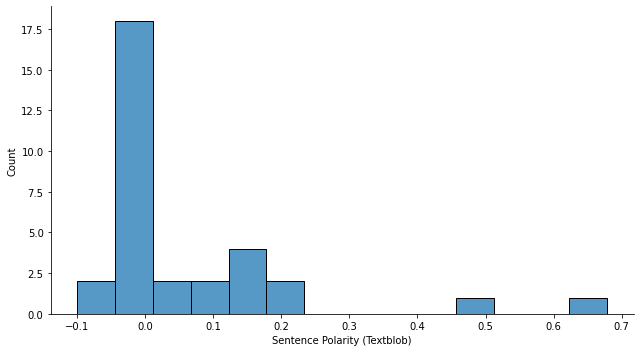

In [23]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

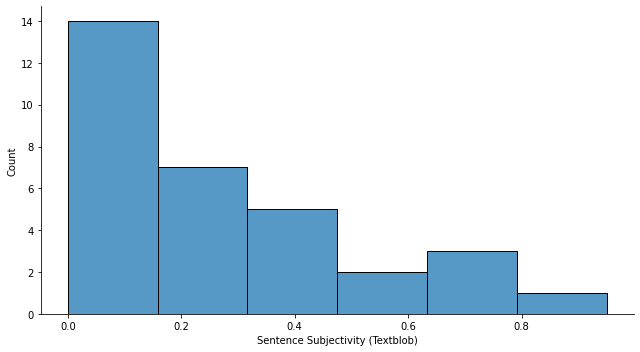

In [24]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

#### tokenizing the text into words for making a word cloud

In [26]:
import re

### removing symbols with regular expression

In [27]:
new_clean_text = re.sub(r'[^\w]', ' ', clean_text)

In [28]:
tokens = word_tokenize(new_clean_text)

In [29]:
print(tokens)

['Commercial', 'Companies', 'Advance', 'Space', 'Exploration', 'VIDEO', 'newsynewsU', 'S', 'NewsWORLDPoliticsScience', 'HealthTechBusinessEntertainmentSportsinvestigationsdocumentariesshowsschedulewhere', 'to', 'watchHow', 'Commercial', 'Companies', 'Are', 'Advancing', 'Space', 'ExplorationShareTweetEmailSMSHow', 'Commercial', 'Companies', 'Are', 'Advancing', 'Space', 'ExplorationBy', 'Clayton', 'SandellBy', 'Clayton', 'SandellOctober', '29', '2021October', '29', '2021Theres', 'competition', 'among', 'roughly', 'a', 'dozen', 'private', 'companies', 'to', 'launch', 'new', 'space', 'stations', 'As', 'astronauts', 'blast', 'off', 'to', 'the', 'International', 'Space', 'Station', 'this', 'weekend', 'on', 'a', 'SpaceX', 'rocket', 'the', 'company', 'is', 'also', 'showing', 'off', 'a', 'massive', 'ship', 'it', 'says', 'will', 'one', 'day', 'take', 'travelers', 'far', 'far', 'away', 'Newly', 'released', 'video', 'shows', 'the', 'Starship', 'lifting', 'into', 'an', 'aerial', 'ballet', 'of', 'fl

#### converting all the words into lower case

In [30]:
words = []

for word in tokens:
    words.append(word.lower())

In [31]:
words[:10]

['commercial',
 'companies',
 'advance',
 'space',
 'exploration',
 'video',
 'newsynewsu',
 's',
 'newsworldpoliticsscience',
 'healthtechbusinessentertainmentsportsinvestigationsdocumentariesshowsschedulewhere']

#### getting the frequency of words used in article

In [35]:
freq_dist = nltk.FreqDist(words_new)

#### figure showing frequency of words in the article

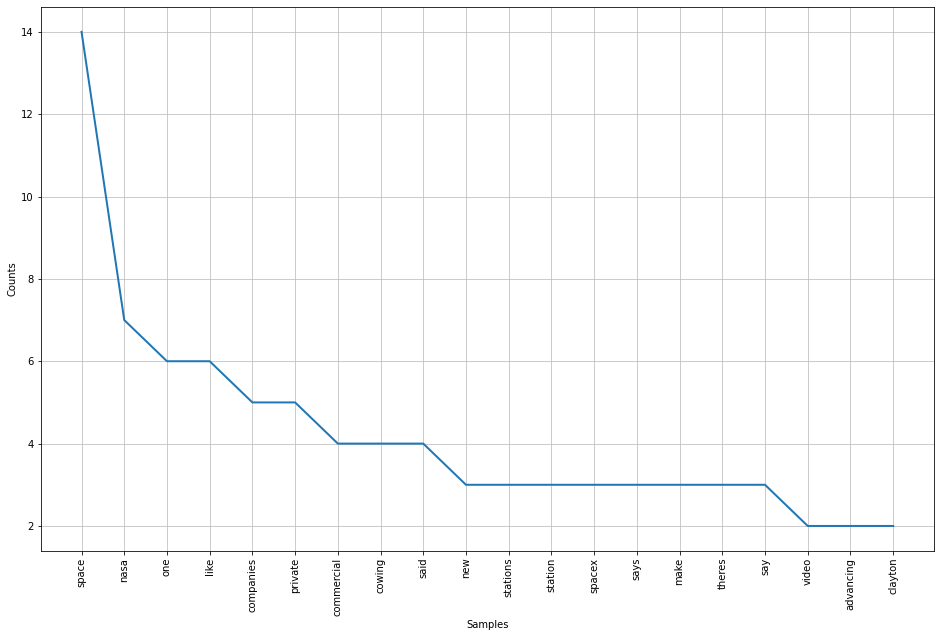

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [36]:
plt.subplots(figsize=(16,10))
freq_dist.plot(20)

In [37]:
res=' '.join([i for i in words_new if not i.isdigit()])

### plotting a WordCloud

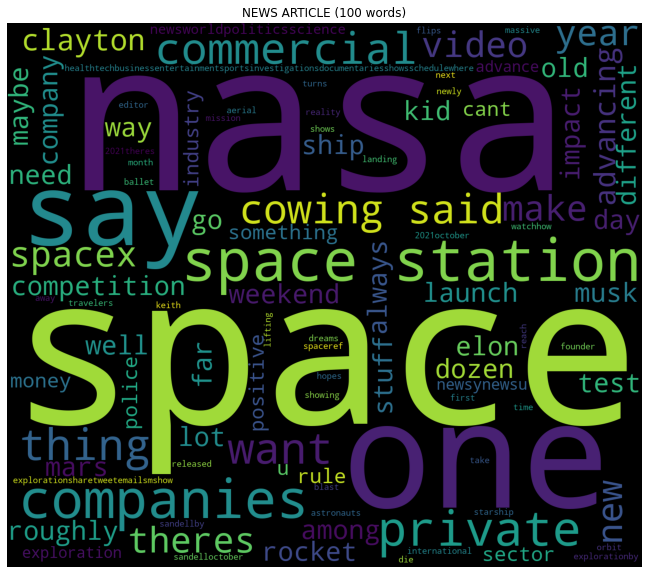

In [38]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('NEWS ARTICLE (100 words)')
plt.axis('off')
plt.show()

In [39]:
df_textblob.to_csv('article.csv', index=False)